In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import seaborn as sns
import statsmodels.api as sm
import sklearn.preprocessing

In [2]:
# Read in rb stats files
teStatsFiles = [filename for filename in glob.glob("C:/Users/Michael/Desktop/Springboard/Capstone2/csvFiles/DFS_Data/TE/stats/*.csv")]
teStatsFiles[0]

'C:/Users/Michael/Desktop/Springboard/Capstone2/csvFiles/DFS_Data/TE/stats\\TE2011.csv'

In [3]:
# Extract season and fix playoff weeks to match other tables

dfs = []
dfsPlayoffs = []

for i in range(int(len(teStatsFiles)/2)):
    df = pd.read_csv(teStatsFiles[i])
    df['season'] = teStatsFiles[i][-8:-4]
    dfs.append(df)

# second half of list has playoff games, need to fix their weeks, then combine with first table    
for i in range(int(len(teStatsFiles)/2),int(len(teStatsFiles)/2)*2):
    dfPlayoffs = pd.read_csv(teStatsFiles[i])
    dfPlayoffs['season'] = teStatsFiles[i][-8:-4]
    dfsPlayoffs.append(dfPlayoffs)

    
for i in range(len(dfsPlayoffs)):
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 1, 'Week'] = 18
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 2, 'Week'] = 19
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 3, 'Week'] = 20
    dfsPlayoffs[i].loc[dfsPlayoffs[i].Week == 4, 'Week'] = 21


# dfsPlayoffs[-1].head()

te = pd.concat(dfs,axis=0)
te = te.append(dfsPlayoffs)
te.head()

,Rank,Name,Team,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,...,ReceivingYardsPerReception,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameFanDuel,FantasyPointsFanDuel,season
0,1,Rob Gronkowski,NE,TE,14,WAS,10,6,60.0,160,...,26.7,0,0,0.0,0,0,0,31.0,31.0,2011
1,2,Jermichael Finley,GB,TE,3,CHI,8,7,87.5,85,...,12.1,0,0,0.0,0,0,0,30.0,30.0,2011
2,3,Rob Gronkowski,NE,TE,10,NYJ,11,8,72.7,113,...,14.1,0,0,0.0,0,0,0,27.3,27.3,2011
3,4,Rob Gronkowski,NE,TE,13,IND,6,5,83.3,64,...,12.8,1,2,2.0,1,0,0,27.1,27.1,2011
4,5,Jared Cook,TEN,TE,16,JAX,8,8,100.0,169,...,21.1,0,0,0.0,0,0,0,26.9,26.9,2011


In [4]:
# Pull data from other workbooks
awayMatchup = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//awayMatchup.csv',index_col=0)
homeMatchup = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//homeMatchup.csv',index_col=0)
oddsTable = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//oddsTable.csv',index_col=0)
finalTeamGameDataTable = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//teamGameData.csv',index_col=0)
rollAvgGameData = pd.read_csv('C://Users//Michael//Desktop//Springboard//Capstone2//csvFiles//rollAvgGameData.csv',index_col=0)

In [5]:
awayMatchup.head()

,gameId,date,season,week,team_x,homeAway,stadium,roof,surface,avgPf,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,201811110kan,2018-11-11,2018,10,Arizona Cardinals,away,Arrowhead Stadium,outdoors,grass,14.857143,...,0.065,37.857143,-10.285714,-13.857143,-10.600000,-16.071429,0.657143,-0.315,-0.700,14
1,201610300car,2016-10-30,2016,8,Arizona Cardinals,away,Bank of America Stadium,outdoors,grass,22.714286,...,0.036,51.285714,3.000000,4.457143,-2.228571,3.257143,-3.157143,-0.039,0.208,20
2,201612240sea,2016-12-24,2016,16,Arizona Cardinals,away,CenturyLink Field,outdoors,turf,25.857143,...,-0.114,43.857143,0.757143,-3.042857,7.171429,-14.242857,-9.314286,-0.250,-0.160,34
3,201812300sea,2018-12-30,2018,17,Arizona Cardinals,away,CenturyLink Field,outdoors,turf,13.000000,...,0.016,36.857143,-7.400000,-13.642857,-7.628571,-6.100000,-7.414286,-0.409,-0.500,24
4,201712310sea,2017-12-31,2017,17,Arizona Cardinals,away,CenturyLink Field,outdoors,turf,18.571429,...,-0.036,41.000000,-9.228571,-2.514286,-15.628571,-5.085714,-6.285714,-0.227,-0.159,26


In [6]:
# Clean up the Team column to match the team column in awayTable and homeTable
teams1 = set(te['Team'])
teams1.remove('SF')
teams2 = set(awayMatchup['team_x'])
teams2.remove('San Francisco 49ers')
t1List = list(teams1)
t2List = list(teams2)
t1List.sort()
t2List.sort()
zipTeams = zip(t1List, t2List)
teamDict = dict(list(zipTeams))
teamDict['SF'] = 'San Francisco 49ers'
teamDict

{'ARI': 'Arizona Cardinals',
 'ATL': 'Atlanta Falcons',
 'BAL': 'Baltimore Ravens',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'HOU': 'Houston Texans',
 'IND': 'Indianapolis Colts',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LAC': 'Los Angeles Chargers',
 'LAR': 'Los Angeles Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NE': 'New England Patriots',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'OAK': 'Oakland Raiders',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SEA': 'Seattle Seahawks',
 'TB': 'Tampa Bay Buccaneers',
 'TEN': 'Tennessee Titans',
 'WAS': 'Washington Redskins',
 'SF': 'San Francisco 49ers'}

In [7]:
teamDict2 = {'ARI': 'Cardinals',
 'ATL': 'Falcons',
 'BAL': 'Ravens',
 'BUF': 'Bills',
 'CAR': 'Panthers',
 'CHI': 'Bears',
 'CIN': 'Bengals',
 'CLE': 'Browns',
 'DAL': 'Cowboys',
 'DEN': 'Broncos',
 'DET': 'Lions',
 'GB': 'Packers',
 'HOU': 'Texans',
 'IND': 'Colts',
 'JAX': 'Jaguars',
 'KC': 'Chiefs',
 'LAC': 'Chargers',
 'LAR': 'Rams',
 'MIA': 'Dolphins',
 'MIN': 'Vikings',
 'NE': 'Patriots',
 'NO': 'Saints',
 'NYG': 'Giants',
 'NYJ': 'Jets',
 'OAK': 'Raiders',
 'PHI': 'Eagles',
 'PIT': 'Steelers',
 'SEA': 'Seahawks',
 'TB': 'Buccaneers',
 'TEN': 'Titans',
 'WAS': 'Redskins',
 'SF': '49ers'}

In [8]:
teamDict3 = zip(teamDict.values(),teamDict2.values())
teamDict3 = dict(list(teamDict3))
teamDict3

{'Arizona Cardinals': 'Cardinals',
 'Atlanta Falcons': 'Falcons',
 'Baltimore Ravens': 'Ravens',
 'Buffalo Bills': 'Bills',
 'Carolina Panthers': 'Panthers',
 'Chicago Bears': 'Bears',
 'Cincinnati Bengals': 'Bengals',
 'Cleveland Browns': 'Browns',
 'Dallas Cowboys': 'Cowboys',
 'Denver Broncos': 'Broncos',
 'Detroit Lions': 'Lions',
 'Green Bay Packers': 'Packers',
 'Houston Texans': 'Texans',
 'Indianapolis Colts': 'Colts',
 'Jacksonville Jaguars': 'Jaguars',
 'Kansas City Chiefs': 'Chiefs',
 'Los Angeles Chargers': 'Chargers',
 'Los Angeles Rams': 'Rams',
 'Miami Dolphins': 'Dolphins',
 'Minnesota Vikings': 'Vikings',
 'New England Patriots': 'Patriots',
 'New Orleans Saints': 'Saints',
 'New York Giants': 'Giants',
 'New York Jets': 'Jets',
 'Oakland Raiders': 'Raiders',
 'Philadelphia Eagles': 'Eagles',
 'Pittsburgh Steelers': 'Steelers',
 'Seattle Seahawks': 'Seahawks',
 'Tampa Bay Buccaneers': 'Buccaneers',
 'Tennessee Titans': 'Titans',
 'Washington Redskins': 'Redskins',
 'Sa

In [9]:
# Map dictionary keys to new values so we have matching team/opponent names across the board
te['Team'] = te['Team'].map(teamDict2)
te['Opponent'] = te['Opponent'].map(teamDict2)

# qbSalaries['Team'] = qbSalaries['Team'].map(teamDict2)
# qbSalaries['Opponent'] = qbSalaries['Opponent'].map(teamDict2)


awayMatchup['team_x'] = awayMatchup['team_x'].map(teamDict3)
awayMatchup['team_y'] = awayMatchup['team_y'].map(teamDict3)
homeMatchup['team_x'] = homeMatchup['team_x'].map(teamDict3)
homeMatchup['team_y'] = homeMatchup['team_y'].map(teamDict3)

awayMatchup.head()

,gameId,date,season,week,team_x,homeAway,stadium,roof,surface,avgPf,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,201811110kan,2018-11-11,2018,10,Cardinals,away,Arrowhead Stadium,outdoors,grass,14.857143,...,0.065,37.857143,-10.285714,-13.857143,-10.600000,-16.071429,0.657143,-0.315,-0.700,14
1,201610300car,2016-10-30,2016,8,Cardinals,away,Bank of America Stadium,outdoors,grass,22.714286,...,0.036,51.285714,3.000000,4.457143,-2.228571,3.257143,-3.157143,-0.039,0.208,20
2,201612240sea,2016-12-24,2016,16,Cardinals,away,CenturyLink Field,outdoors,turf,25.857143,...,-0.114,43.857143,0.757143,-3.042857,7.171429,-14.242857,-9.314286,-0.250,-0.160,34
3,201812300sea,2018-12-30,2018,17,Cardinals,away,CenturyLink Field,outdoors,turf,13.000000,...,0.016,36.857143,-7.400000,-13.642857,-7.628571,-6.100000,-7.414286,-0.409,-0.500,24
4,201712310sea,2017-12-31,2017,17,Cardinals,away,CenturyLink Field,outdoors,turf,18.571429,...,-0.036,41.000000,-9.228571,-2.514286,-15.628571,-5.085714,-6.285714,-0.227,-0.159,26


In [10]:
#turn seasons to numeric instead of strings
te['season'] = pd.to_numeric(te['season'])
# qbSalaries['season'] = pd.to_numeric(qbSalaries['season'])

# Merge qb table with matchup tables, then put the two together
teTable1 = pd.merge(te,awayMatchup,how='inner',left_on=['Team','season','Week'],right_on=['team_x','season','week'])

teTable2 = pd.merge(te,homeMatchup,how='inner',left_on=['Team','season','Week'],right_on=['team_x','season','week'])

teTableFinal = pd.concat([teTable1,teTable2],axis=0)

teTableFinal.head()

# rbTableFinal = pd.merge(rbTable,rbSalaries,how='inner',left_on=['Name', 'Team', 'Position', 'Week', 'Opponent','season'],right_on=['Name', 'Team', 'Position', 'Week', 'Opponent','season'])
# rbTableFinal.columns

,Rank,Name,Team,Position,Week,Opponent,ReceivingTargets,Receptions,ReceptionPercentage,ReceivingYards,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,1,Rob Gronkowski,Patriots,TE,14,Redskins,10,6,60.0,160,...,0.003,52.857143,10.100000,9.528571,9.428571,8.385714,-1.385714,0.338,0.392,34
1,137,Aaron Hernandez,Patriots,TE,14,Redskins,7,5,71.4,84,...,0.003,52.857143,10.100000,9.528571,9.428571,8.385714,-1.385714,0.338,0.392,34
2,2,Jermichael Finley,Packers,TE,3,Bears,8,7,87.5,85,...,-0.083,49.714286,13.971429,7.857143,14.914286,9.285714,-3.171429,0.513,0.135,27
3,838,Andrew Quarless,Packers,TE,3,Bears,0,0,0.0,0,...,-0.083,49.714286,13.971429,7.857143,14.914286,9.285714,-3.171429,0.513,0.135,27
4,838,Tom Crabtree,Packers,TE,3,Bears,0,0,0.0,0,...,-0.083,49.714286,13.971429,7.857143,14.914286,9.285714,-3.171429,0.513,0.135,27


In [11]:
tes = teTableFinal[(teTableFinal['ReceivingTargets'] >= 2)]

tes = pd.merge(tes,oddsTable,how='inner',left_on=['Team','season','Week'],right_on=['team','season','week'])

tes.loc[tes.pf > tes.pa, 'winLose'] = 'Win'
tes.loc[tes.pf < tes.pa, 'winLose'] = 'Loss'
tes.loc[tes.pf == tes.pa, 'winLose'] = 'Tie'

tes.loc[tes.totalScore > tes.total, 'result'] = 'over'
tes.loc[tes.totalScore < tes.total, 'result'] = 'under'
tes.loc[tes.totalScore == tes.total, 'result'] = 'push'

# Turn date column into datetime data
tes['date_x'] = pd.to_datetime(tes['date_x'])

In [12]:
# Create a column of running averages for each player's fantasy points. Use previous 7-game averages

tes = tes.set_index(['date_x','Name'])
tes = tes[~tes.index.duplicated()]
tes.sort_index().groupby('Name').get_group('Delanie Walker')['FantasyPointsFanDuel']



date_x      Name          
2011-09-18  Delanie Walker    10.8
2011-09-25  Delanie Walker     1.4
2011-10-02  Delanie Walker     3.5
2011-10-09  Delanie Walker    10.7
2011-10-16  Delanie Walker     8.1
                              ... 
2017-12-03  Delanie Walker    14.8
2017-12-10  Delanie Walker     6.7
2017-12-17  Delanie Walker    10.2
2017-12-24  Delanie Walker     4.8
2017-12-31  Delanie Walker     3.4
Name: FantasyPointsFanDuel, Length: 88, dtype: float64

In [13]:
tes['FantasyPointsPerGame7'] = tes.sort_index().groupby('Name')['FantasyPointsFanDuel'].apply(lambda x: x.shift(1).rolling(window=7).mean())

tes = tes.fillna(method='bfill')
tes = tes.reset_index()

In [14]:
tester = tes[['Name','date_x','season','Week','FantasyPointsFanDuel','FantasyPointsPerGame7']].sort_values(['Name','date_x'])
tester[tester['Name'] == 'Jordan Reed']

,Name,date_x,season,Week,FantasyPointsFanDuel,FantasyPointsPerGame7
749,Jordan Reed,2013-09-15,2013,2,9.3,5.514286
3321,Jordan Reed,2013-09-22,2013,3,7.5,5.285714
776,Jordan Reed,2013-10-13,2013,6,7.8,7.128571
3162,Jordan Reed,2013-10-20,2013,7,23.9,6.957143
683,Jordan Reed,2013-10-27,2013,8,13.0,8.885714
3318,Jordan Reed,2013-11-03,2013,9,7.5,4.542857
654,Jordan Reed,2013-11-07,2013,10,15.2,3.685714
996,Jordan Reed,2014-10-12,2014,6,13.2,12.028571
3611,Jordan Reed,2014-10-19,2014,7,7.9,12.585714
1092,Jordan Reed,2014-10-27,2014,8,7.5,12.642857


In [15]:
tes.columns

Index(['date_x', 'Name', 'Rank', 'Team', 'Position', 'Week', 'Opponent',
       'ReceivingTargets', 'Receptions', 'ReceptionPercentage',
       'ReceivingYards', 'ReceivingTouchdowns', 'ReceivingLong',
       'ReceivingYardsPerTarget', 'ReceivingYardsPerReception',
       'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt',
       'RushingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameFanDuel', 'FantasyPointsFanDuel', 'season',
       'gameId', 'week_x', 'team_x', 'homeAway', 'stadium', 'roof', 'surface',
       'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk', 'avgRecv',
       'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa', 'overUnder',
       'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y', 'avgDef', 'avgRdef',
       'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa', 'ptsMatchup',
       'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup', 'runMatchup',
       'offDvoaMatchup', 'totalDvoaMatchup', 'pf', 'date_y', 'week_y', 'team',
       '

In [16]:
teVars = ['gameId','Name', 'Team', 'season', 'Week', 'Opponent','homeAway', 'ReceivingTargets', 'Receptions',
          'ReceptionPercentage','ReceivingYards', 'ReceivingTouchdowns',
          'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk', 'avgRecv',
          'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa','pa','avgPa','avgOvr_y', 'avgDef', 'avgRdef',
          'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa', 'ptsMatchup',
          'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup', 'runMatchup',
          'offDvoaMatchup', 'totalDvoaMatchup', 'pf','spread','total','result','impliedTotal',
          'FantasyPointsPerGame7','FantasyPointsFanDuel']
catTeVars = ['homeAway', 'surface', 'roof','winLose', 'result']

In [17]:
newTes = tes[teVars]
newTes.tail()

,gameId,Name,Team,season,Week,Opponent,homeAway,ReceivingTargets,Receptions,ReceptionPercentage,...,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf,spread,total,result,impliedTotal,FantasyPointsPerGame7,FantasyPointsFanDuel
5062,201812090buf,Logan Thomas,Bills,2018,14,Jets,home,2,1,50.0,...,-3.328571,-0.395,-0.059,23,-4.5,37.0,over,20.75,6.357143,1.0
5063,201812230nor,Benjamin Watson,Saints,2018,16,Steelers,home,2,1,50.0,...,7.171429,0.178,0.107,31,-6.5,53.5,over,30.00,6.357143,1.1
5064,201812230nor,Josh Hill,Saints,2018,16,Steelers,home,3,2,66.7,...,7.171429,0.178,0.107,31,-6.5,53.5,over,30.00,4.228571,1.1
5065,201811180jax,James O'Shaughnessy,Jaguars,2018,11,Steelers,home,2,1,50.0,...,-21.342857,-0.140,-0.133,16,4.0,47.0,under,21.50,5.014286,0.9
5066,201809300oti,Jonnu Smith,Titans,2018,4,Eagles,home,2,0,0.0,...,-3.128571,-0.390,-0.474,26,2.5,41.5,over,19.50,3.657143,0.0


In [18]:
corr = newTes.corr()
corr.style.background_gradient(cmap='coolwarm')

In [19]:
rollAvgGameData.head()

,date,team,gameId,totExp,oTot,oPass,oRush,oTov,dTot,dPass,...,passCompAvg,passAttAvg,passYdsAvg,passTdsAvg,intsAvg,timesSackedAvg,yardsLostOnSacksAvg,totalSecondsAvg,lateDownConvAvg,lateDownAttAvg
0,2010-09-09,Vikings,201009090nor,-5.0,-6.45,-5.54,-0.91,-4.17,-2.86,-4.60,...,21.142857,36.714286,224.285714,1.285714,1.142857,2.571429,15.428571,1748.857143,5.571429,15.285714
1,2010-09-09,Saints,201009090nor,5.0,2.86,4.60,-1.42,0.00,6.45,5.54,...,21.142857,36.714286,224.285714,1.285714,1.142857,2.571429,15.428571,1748.857143,5.571429,15.285714
2,2010-09-12,Falcons,201009120pit,-6.0,-8.90,-4.99,-3.91,-3.92,3.01,0.92,...,21.142857,36.714286,224.285714,1.285714,1.142857,2.571429,15.428571,1748.857143,5.571429,15.285714
3,2010-09-12,Steelers,201009120pit,6.0,-3.01,-0.92,-1.43,-3.79,8.90,4.99,...,21.142857,36.714286,224.285714,1.285714,1.142857,2.571429,15.428571,1748.857143,5.571429,15.285714
4,2010-09-12,Titans,201009120oti,25.0,10.04,6.91,3.79,-4.66,14.46,12.28,...,21.142857,36.714286,224.285714,1.285714,1.142857,2.571429,15.428571,1748.857143,5.571429,15.285714


In [20]:
rollAvgGameData.columns

Index(['date', 'team', 'gameId', 'totExp', 'oTot', 'oPass', 'oRush', 'oTov',
       'dTot', 'dPass', 'dRush', 'dTov', 'stTot', 'stKo', 'stKr', 'stP',
       'stPr', 'fgxp', 'firstDowns', 'netPyds', 'totYds', 'to', 'rushAtt',
       'rushYds', 'rushTds', 'passComp', 'passAtt', 'passYds', 'passTds',
       'ints', 'timesSacked', 'yardsLostOnSacks', 'fumbles', 'fumblesLost',
       'totalSeconds', 'lateDownConv', 'lateDownAtt', 'totExpAvg', 'oTotAvg',
       'oPassAvg', 'oRushAvg', 'oTovAvg', 'dTotAvg', 'dPassAvg', 'dRushAvg',
       'dTovAvg', 'stTotAvg', 'stKoAvg', 'stKrAvg', 'stPAvg', 'stPrAvg',
       'fgxpAvg', 'firstDownsAvg', 'netPydsAvg', 'totYdsAvg', 'toAvg',
       'rushAttAvg', 'rushYdsAvg', 'rushTdsAvg', 'passCompAvg', 'passAttAvg',
       'passYdsAvg', 'passTdsAvg', 'intsAvg', 'timesSackedAvg',
       'yardsLostOnSacksAvg', 'totalSecondsAvg', 'lateDownConvAvg',
       'lateDownAttAvg'],
      dtype='object')

In [21]:
# Setup a list for offensive columns and defensive columns from the rollAvgGameData table
# goal is to join a player's offensive metrics from roll avg table, and his opponent's defensive metrics

offRollCols = ['date','gameId','team','oTot', 'oPass', 'oRush', 'oTov','firstDowns', 'netPyds', 'totYds', 'to',
       'timesSacked', 'yardsLostOnSacks', 'fumbles', 'fumblesLost',
       'totalSeconds', 'lateDownConv', 'lateDownAtt', 'totExpAvg', 'oTotAvg',
       'oPassAvg', 'oRushAvg', 'oTovAvg','firstDownsAvg', 'netPydsAvg', 'totYdsAvg', 'toAvg',
       'passCompAvg', 'passAttAvg', 'passYdsAvg', 'passTdsAvg', 'intsAvg', 'timesSackedAvg',
       'yardsLostOnSacksAvg', 'totalSecondsAvg', 'lateDownConvAvg',
       'lateDownAttAvg']

defRollCols = ['date','gameId','team','dTot', 'dPass', 'dRush', 'dTov','dTotAvg', 'dPassAvg', 'dRushAvg', 'dTovAvg']

offRollTable = rollAvgGameData[offRollCols]

defRollTable = rollAvgGameData[defRollCols]
defRollTable.head()

,date,gameId,team,dTot,dPass,dRush,dTov,dTotAvg,dPassAvg,dRushAvg,dTovAvg
0,2010-09-09,201009090nor,Vikings,-2.86,-4.60,1.42,0.00,4.021429,0.408571,2.307143,6.574286
1,2010-09-09,201009090nor,Saints,6.45,5.54,0.91,4.17,4.021429,0.408571,2.307143,6.574286
2,2010-09-12,201009120pit,Falcons,3.01,0.92,1.43,3.79,4.021429,0.408571,2.307143,6.574286
3,2010-09-12,201009120pit,Steelers,8.90,4.99,3.91,3.92,4.021429,0.408571,2.307143,6.574286
4,2010-09-12,201009120oti,Titans,14.46,12.28,-1.81,11.46,4.021429,0.408571,2.307143,6.574286


In [22]:
newTes = newTes.merge(offRollTable,left_on=['gameId','Team'],right_on=['gameId','team'])
newTes.columns

Index(['gameId', 'Name', 'Team', 'season', 'Week', 'Opponent', 'homeAway',
       'ReceivingTargets', 'Receptions', 'ReceptionPercentage',
       'ReceivingYards', 'ReceivingTouchdowns', 'avgPf', 'avgOvr_x', 'avgOff',
       'avgPass', 'avgPblk', 'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x',
       'offDvoa', 'stDvoa', 'pa', 'avgPa', 'avgOvr_y', 'avgDef', 'avgRdef',
       'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa', 'ptsMatchup',
       'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup', 'runMatchup',
       'offDvoaMatchup', 'totalDvoaMatchup', 'pf', 'spread', 'total', 'result',
       'impliedTotal', 'FantasyPointsPerGame7', 'FantasyPointsFanDuel', 'date',
       'team', 'oTot', 'oPass', 'oRush', 'oTov', 'firstDowns', 'netPyds',
       'totYds', 'to', 'timesSacked', 'yardsLostOnSacks', 'fumbles',
       'fumblesLost', 'totalSeconds', 'lateDownConv', 'lateDownAtt',
       'totExpAvg', 'oTotAvg', 'oPassAvg', 'oRushAvg', 'oTovAvg',
       'firstDownsAvg', 'netPydsAvg', 'totYds

In [23]:
corr = newTes[newTes['Name'] == 'Greg Olsen'].corr()
corr.style.background_gradient(cmap='coolwarm')

In [24]:
lookVars = ['Name', 'Team', 'season', 'Week', 'Opponent','homeAway','spread', 'total','result',
       'impliedTotal','pf','pa', 'FantasyPointsFanDuel']

In [29]:
dw = newTes[(newTes['Name'] == 'Travis Kelce')]
dw[(dw['result'] == 'over') & (dw['homeAway'] == 'away')][lookVars].sort_values('FantasyPointsFanDuel',ascending=False)
dw[lookVars].sort_values('FantasyPointsFanDuel',ascending=False)
# np.mean(dw[(dw['spread'] <= 0) & (dw['homeAway'] == 'home')]['FantasyPointsFanDuel'])

,Name,Team,season,Week,Opponent,homeAway,spread,total,result,impliedTotal,pf,pa,FantasyPointsFanDuel
2155,Travis Kelce,Chiefs,2018,13,Raiders,away,-14.0,53.5,over,33.75,40,33,32.8
3975,Travis Kelce,Chiefs,2016,16,Broncos,home,-3.5,37.5,over,20.50,33,10,27.5
2160,Travis Kelce,Chiefs,2018,2,Steelers,away,4.5,52.0,over,23.75,42,37,26.4
2161,Travis Kelce,Chiefs,2018,9,Browns,away,-7.5,51.0,over,29.25,37,21,25.4
2163,Travis Kelce,Chiefs,2018,11,Rams,away,3.0,63.5,over,30.25,51,54,23.7
1815,Travis Kelce,Chiefs,2017,13,Jets,away,-3.5,44.0,over,23.75,31,38,23.4
4310,Travis Kelce,Chiefs,2017,8,Broncos,home,-7.0,42.0,over,24.50,29,19,22.8
4315,Travis Kelce,Chiefs,2017,4,Redskins,home,-6.5,48.0,over,27.25,29,20,20.9
4316,Travis Kelce,Chiefs,2017,2,Eagles,home,-4.0,46.5,over,25.25,27,20,20.3
1507,Travis Kelce,Chiefs,2016,8,Colts,away,-3.0,50.5,under,26.75,30,14,19.6


In [377]:
rollAvgGameData['date'] = pd.to_datetime(rollAvgGameData['date'])

In [396]:
np.mean(rollAvgGameData.loc[(rollAvgGameData['team'] == 'Jaguars') & (rollAvgGameData['date'] >= '2017')]['rushAtt'])

28.305555555555557

In [18]:
class QB:
    
    def __init__(self,name,table):
        self.name = name
        self.table = table[table['Name'] == name]
        
    def get_table(self):
        return self.table
    
    def corrMatrix(self,features):
        correlations = self.table[features].corr()
        return correlations.style.background_gradient(cmap='coolwarm')
    
    def scatter(self,var1,var2):
        plt.scatter(self.table[var1],self.table[var2])
        plt.title(self.name)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()
        
    def impliedTot(self, value):
        return self.table[self.table['impliedTotal'] >= value][qbVars]

In [19]:
cw = QB('Carson Wentz',newQbs)
cw.corrMatrix(qbVars)

,season,Week,PassingTouchdowns,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,1,-0.104989,0.343681,0.115167,0.107367,-0.0849697,-0.0195555,0.138829,-0.268331,0.347185,-0.237697,0.433385,0.266822
Week,-0.104989,1,-0.102958,-0.228281,0.162121,-0.181722,-0.476369,-0.32289,-0.0165863,0.0693375,-0.0443538,0.0541346,-0.109007
PassingTouchdowns,0.343681,-0.102958,1,-0.179483,0.275562,-0.0987102,-0.0485038,0.139696,-0.346233,-0.103335,-0.324235,0.24431,0.873095
defDvoa,0.115167,-0.228281,-0.179483,1,-0.459408,0.228206,0.537269,0.77456,-0.28954,0.37255,-0.287124,0.466454,-0.0885538
avgCov,0.107367,0.162121,0.275562,-0.459408,1,-0.513471,-0.487172,-0.317587,0.127244,-0.234216,0.134629,-0.245255,0.17685
passMatchup,-0.0849697,-0.181722,-0.0987102,0.228206,-0.513471,1,0.781919,0.362512,-0.0872886,0.106734,-0.133138,0.137436,-0.157684
offMatchup,-0.0195555,-0.476369,-0.0485038,0.537269,-0.487172,0.781919,1,0.609249,-0.0858694,0.192263,-0.0901145,0.185044,-0.034592
offDvoaMatchup,0.138829,-0.32289,0.139696,0.77456,-0.317587,0.362512,0.609249,1,-0.47133,0.301589,-0.46945,0.585188,0.166267
spread,-0.268331,-0.0165863,-0.346233,-0.28954,0.127244,-0.0872886,-0.0858694,-0.47133,1,0.0937012,0.974565,-0.822575,-0.386835
total,0.347185,0.0693375,-0.103335,0.37255,-0.234216,0.106734,0.192263,0.301589,0.0937012,1,0.0826605,0.489078,-0.061485


In [20]:
wentz = cw.get_table()
wentz[(wentz['season'] >= 2017) & (wentz['Opponent'] != 'Saints')].corr().style.background_gradient(cmap='coolwarm')

,season,Week,PassingTouchdowns,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,1,0.0965951,-0.230408,0.124756,0.0780274,0.0738187,0.0181505,-0.499724,0.081647,-0.051459,0.119855,-0.108282,-0.31364
Week,0.0965951,1,0.23381,-0.332987,0.218832,0.54129,-0.00444117,-0.0631066,-0.239432,0.111698,-0.248535,0.296915,0.107892
PassingTouchdowns,-0.230408,0.23381,1,-0.596901,0.215734,0.138908,-0.120177,-0.296554,-0.0338535,-0.179739,-0.0595472,-0.0608807,0.86995
defDvoa,0.124756,-0.332987,-0.596901,1,-0.54901,0.104537,0.542521,0.586416,-0.16723,0.0743403,-0.193147,0.205446,-0.478881
avgCov,0.0780274,0.218832,0.215734,-0.54901,1,-0.530244,-0.699645,-0.487164,0.35968,-0.0843503,0.346116,-0.402136,0.287754
passMatchup,0.0738187,0.54129,0.138908,0.104537,-0.530244,1,0.639641,0.321193,-0.558226,-0.0163302,-0.560512,0.546659,0.0694399
offMatchup,0.0181505,-0.00444117,-0.120177,0.542521,-0.699645,0.639641,1,0.43554,-0.115631,0.340661,-0.135224,0.294224,-0.0176635
offDvoaMatchup,-0.499724,-0.0631066,-0.296554,0.586416,-0.487164,0.321193,0.43554,1,-0.444964,-0.040933,-0.481224,0.421058,-0.241557
spread,0.081647,-0.239432,-0.0338535,-0.16723,0.35968,-0.558226,-0.115631,-0.444964,1,0.254279,0.969619,-0.860902,0.00499962
total,-0.051459,0.111698,-0.179739,0.0743403,-0.0843503,-0.0163302,0.340661,-0.040933,0.254279,1,0.258867,0.273138,-0.00679832


In [22]:
wentz[(wentz['season'] >= 2018)] #& (wentz['defDvoa'] <= 0) & (wentz['Opponent'] != 'Saints')]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
1837,Carson Wentz,Eagles,QB,2018,6,Giants,away,turf,0.054,64.442857,11.057143,7.371429,-0.015,-1.5,45.5,-122.0,23.50,Win,over,24.52
1870,Carson Wentz,Eagles,QB,2018,4,Titans,away,grass,0.027,64.057143,3.685714,5.014286,-0.004,-2.5,41.5,-135.0,22.00,Loss,over,20.72
1894,Carson Wentz,Eagles,QB,2018,14,Cowboys,away,turf,-0.074,70.928571,-3.871429,-2.214286,-0.107,3.0,45.5,163.0,21.25,Loss,over,18.82
2044,Carson Wentz,Eagles,QB,2018,11,Saints,away,turf,0.067,60.014286,13.928571,3.914286,0.026,7.0,56.5,270.0,24.75,Loss,under,3.84
3932,Carson Wentz,Eagles,QB,2018,10,Cowboys,home,grass,-0.005,64.500000,7.728571,2.542857,-0.052,-7.5,45.5,-345.0,26.50,Loss,over,22.10
4041,Carson Wentz,Eagles,QB,2018,12,Giants,home,grass,0.077,63.400000,6.971429,7.271429,-0.002,-5.0,49.5,-210.0,27.25,Win,under,13.24
4045,Carson Wentz,Eagles,QB,2018,3,Colts,home,grass,-0.024,66.657143,-4.357143,-2.342857,0.050,-6.0,45.0,-270.0,25.50,Win,under,12.20


In [23]:
newWentz = wentz[['Name','season','Week','Opponent','defDvoa','FantasyPointsFanDuel']]
newWentz = newWentz.append({'Name':'Carson Wentz','season': 2018,'Week':5,'Opponent':'Vikings','defDvoa':.072,'FantasyPointsFanDuel':21.04},ignore_index=True)
newWentz = newWentz.append({'Name':'Carson Wentz','season': 2018,'Week':8,'Opponent':'Jaguars','defDvoa':-.107,'FantasyPointsFanDuel':24.14},ignore_index=True)
newWentz = newWentz.append({'Name':'Carson Wentz','season': 2018,'Week':7,'Opponent':'Panthers','defDvoa':.032,'FantasyPointsFanDuel':18.7},ignore_index=True)
newWentz = newWentz.append({'Name':'Carson Wentz','season': 2018,'Week':13,'Opponent':'Redskins','defDvoa':.001,'FantasyPointsFanDuel':20.84},ignore_index=True)
newWentz = newWentz[newWentz['season'] >= 2017]
newWentz = newWentz[newWentz['Opponent'] != 'Saints']
newWentz.corr().style.background_gradient(cmap='coolwarm')

,season,Week,defDvoa,FantasyPointsFanDuel
season,1,0.111673,0.115182,-0.259264
Week,0.111673,1,-0.327858,0.104153
defDvoa,0.115182,-0.327858,1,-0.48813
FantasyPointsFanDuel,-0.259264,0.104153,-0.48813,1


In [24]:
np.mean(newWentz[newWentz['defDvoa'] <= 0]['FantasyPointsFanDuel'])

22.40833333333333

In [25]:
newWentz[newWentz['defDvoa'] >= 0]

,Name,season,Week,Opponent,defDvoa,FantasyPointsFanDuel
9,Carson Wentz,2017,2,Chiefs,0.054,25.82
11,Carson Wentz,2017,11,Cowboys,0.068,20.02
12,Carson Wentz,2017,1,Redskins,0.018,19.88
15,Carson Wentz,2018,6,Giants,0.054,24.52
16,Carson Wentz,2018,4,Titans,0.027,20.72
31,Carson Wentz,2017,8,49ers,0.159,18.14
32,Carson Wentz,2017,3,Giants,0.154,13.24
34,Carson Wentz,2018,12,Giants,0.077,13.24
36,Carson Wentz,2018,5,Vikings,0.072,21.04
38,Carson Wentz,2018,7,Panthers,0.032,18.70


In [26]:
dak = QB('Dak Prescott',newQbs)
dak.corrMatrix(qbVars)

,season,Week,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,1,0.0054834,0.171652,0.0169323,-0.0512327,-0.560654,-0.538994,0.256104,-0.380384,0.260029,-0.442085,-0.00694513
Week,0.0054834,1,0.138898,0.364834,-0.183901,-0.109513,0.161034,-0.0870514,0.0554188,-0.129601,0.103092,0.00694847
defDvoa,0.171652,0.138898,1,-0.37369,0.166791,0.314995,0.576385,0.0368484,0.271233,0.0298804,0.144544,0.0699076
avgCov,0.0169323,0.364834,-0.37369,1,-0.666959,-0.55473,-0.135713,-0.0129476,-0.249729,-0.0077979,-0.149401,-0.359647
passMatchup,-0.0512327,-0.183901,0.166791,-0.666959,1,0.579526,0.167817,-0.0841147,0.331803,-0.114033,0.2773,0.401605
offMatchup,-0.560654,-0.109513,0.314995,-0.55473,0.579526,1,0.602248,-0.190862,0.426079,-0.175836,0.420524,0.223683
offDvoaMatchup,-0.538994,0.161034,0.576385,-0.135713,0.167817,0.602248,1,-0.185637,0.435844,-0.183874,0.422696,-0.0718859
spread,0.256104,-0.0870514,0.0368484,-0.0129476,-0.0841147,-0.190862,-0.185637,1,0.0127377,0.98105,-0.769603,-0.241445
total,-0.380384,0.0554188,0.271233,-0.249729,0.331803,0.426079,0.435844,0.0127377,1,0.008239,0.628668,-0.0581744
moneyLine,0.260029,-0.129601,0.0298804,-0.0077979,-0.114033,-0.175836,-0.183874,0.98105,0.008239,1,-0.757738,-0.27995


In [27]:
dp = dak.get_table()
dp[(dp['impliedTotal'] > 23.25) & (dp['homeAway'] == 'home')]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
3346,Dak Prescott,Cowboys,QB,2016,8,Eagles,home,turf,-0.266,62.757143,9.557143,9.585714,-0.039,-5.0,44.0,-230.0,24.50,Win,over,28.28
3361,Dak Prescott,Cowboys,QB,2016,11,Ravens,home,turf,-0.223,66.900000,2.557143,5.114286,0.011,-7.0,44.5,-300.0,25.75,Win,under,25.64
3370,Dak Prescott,Cowboys,QB,2016,16,Lions,home,turf,0.159,68.971429,4.457143,9.100000,0.379,-6.5,46.5,-265.0,26.50,Win,over,23.98
3375,Dak Prescott,Cowboys,QB,2016,3,Bears,home,turf,-0.036,59.557143,1.785714,6.157143,0.018,-6.5,45.0,-265.0,25.75,Win,over,23.52
3392,Dak Prescott,Cowboys,QB,2016,12,Redskins,home,turf,0.062,63.885714,4.614286,11.328571,0.320,-5.5,52.5,-250.0,29.00,Win,over,21.70
3424,Dak Prescott,Cowboys,QB,2016,15,Buccaneers,home,turf,-0.045,67.985714,-0.371429,6.757143,0.181,-6.5,47.5,-300.0,27.00,Win,under,19.16
3602,Dak Prescott,Cowboys,QB,2017,5,Packers,home,turf,0.007,54.985714,13.242857,7.357143,0.051,-2.5,52.0,-133.0,27.25,Loss,over,30.74
3621,Dak Prescott,Cowboys,QB,2017,9,Chiefs,home,turf,0.100,61.385714,5.428571,8.928571,0.282,-2.5,53.0,-130.0,27.75,Win,under,26.66
3641,Dak Prescott,Cowboys,QB,2017,4,Rams,home,turf,-0.140,62.371429,8.628571,1.200000,-0.154,-5.5,50.5,-235.0,28.00,Loss,over,23.58
3711,Dak Prescott,Cowboys,QB,2017,1,Giants,home,turf,-0.054,63.642857,8.814286,7.500000,0.027,-5.5,46.0,-235.0,25.75,Win,under,17.12


In [33]:
winston = QB('Jameis Winston',newQbs)
winston.corrMatrix(qbVars)

,season,Week,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,1,0.159793,-0.0757086,0.278346,-0.0857523,-0.30049,0.487771,0.100679,0.54319,0.0380374,0.363404,0.0218711
Week,0.159793,1,-0.163745,0.145094,0.148449,-0.128019,0.133591,0.163554,0.312184,0.290525,0.129535,0.0478178
defDvoa,-0.0757086,-0.163745,1,-0.500626,0.14861,0.412692,0.498805,-0.167258,0.287658,-0.110389,0.35799,0.128816
avgCov,0.278346,0.145094,-0.500626,1,-0.561971,-0.654473,-0.153892,0.411248,0.0575433,0.389335,-0.262139,-0.0883123
passMatchup,-0.0857523,0.148449,0.14861,-0.561971,1,0.813019,0.488704,-0.45964,0.220392,-0.348947,0.523062,0.0512665
offMatchup,-0.30049,-0.128019,0.412692,-0.654473,0.813019,1,0.377952,-0.563008,0.0728148,-0.522526,0.48138,0.106941
offDvoaMatchup,0.487771,0.133591,0.498805,-0.153892,0.488704,0.377952,1,-0.249339,0.582971,-0.16452,0.65824,-0.00731588
spread,0.100679,0.163554,-0.167258,0.411248,-0.45964,-0.563008,-0.249339,1,0.178327,0.96167,-0.60639,-0.00429427
total,0.54319,0.312184,0.287658,0.0575433,0.220392,0.0728148,0.582971,0.178327,1,0.268833,0.674287,0.135682
moneyLine,0.0380374,0.290525,-0.110389,0.389335,-0.348947,-0.522526,-0.16452,0.96167,0.268833,1,-0.493524,0.048159


In [37]:
jw = winston.get_table()
jw[(jw['homeAway'] == 'home') & (jw['impliedTotal'] > 23)]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
3177,Jameis Winston,Buccaneers,QB,2015,16,Bears,home,grass,0.089,62.514286,9.942857,11.757143,0.069,-3.0,44.0,NaN,23.50,Loss,over,19.80
3180,Jameis Winston,Buccaneers,QB,2015,13,Falcons,home,grass,0.040,57.642857,13.885714,11.657143,0.004,-1.0,46.5,NaN,23.75,Win,under,19.58
3200,Jameis Winston,Buccaneers,QB,2015,9,Giants,home,grass,0.072,60.128571,3.728571,10.000000,-0.023,2.0,49.0,105.0,23.50,Loss,over,18.28
3259,Jameis Winston,Buccaneers,QB,2015,14,Saints,home,grass,0.248,54.900000,18.300000,15.971429,0.228,-6.0,52.0,NaN,29.00,Loss,under,13.68
3389,Jameis Winston,Buccaneers,QB,2016,9,Falcons,home,grass,0.081,65.214286,2.442857,3.942857,0.023,3.5,50.5,160.0,23.50,Loss,over,21.84
3429,Jameis Winston,Buccaneers,QB,2016,8,Raiders,home,grass,0.149,61.914286,3.300000,6.471429,0.106,-0.0,48.5,-110.0,24.25,Loss,over,18.80
3546,Jameis Winston,Buccaneers,QB,2016,17,Panthers,home,grass,-0.051,69.428571,-1.485714,4.628571,-0.073,-3.0,44.5,-155.0,23.75,Win,under,10.88
3566,Jameis Winston,Buccaneers,QB,2016,14,Saints,home,grass,0.082,59.614286,12.385714,8.657143,0.075,-2.5,51.5,-135.0,27.00,Win,under,8.96
3623,Jameis Winston,Buccaneers,QB,2017,4,Giants,home,grass,0.140,62.771429,2.142857,5.957143,0.159,-2.5,45.5,-130.0,24.00,Win,over,26.48
3680,Jameis Winston,Buccaneers,QB,2017,5,Patriots,home,grass,0.309,63.185714,2.542857,6.371429,0.405,3.5,54.5,170.0,25.50,Loss,under,18.46


In [40]:
wilson = QB('Russell Wilson',newQbs)
wilson.corrMatrix(qbVars)

,season,Week,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,1,0.0210074,0.148461,0.039361,-0.0781624,-0.505249,-0.057467,0.164435,0.36745,0.313363,0.0454283,0.0962569
Week,0.0210074,1,-0.184064,0.188357,-0.0639346,-0.0793175,0.137783,-0.196582,-0.050874,-0.0964401,0.17207,0.213944
defDvoa,0.148461,-0.184064,1,-0.530465,0.422538,0.369092,0.677954,-0.206003,0.316937,-0.298254,0.39611,0.0242526
avgCov,0.039361,0.188357,-0.530465,1,-0.803499,-0.595602,-0.284793,0.284218,-0.0841453,0.367842,-0.34069,0.0287269
passMatchup,-0.0781624,-0.0639346,0.422538,-0.803499,1,0.729271,0.329261,-0.303321,0.0638694,-0.282761,0.348475,-0.0304545
offMatchup,-0.505249,-0.0793175,0.369092,-0.595602,0.729271,1,0.467902,-0.456101,-0.0348246,-0.463268,0.447726,-0.0837531
offDvoaMatchup,-0.057467,0.137783,0.677954,-0.284793,0.329261,0.467902,1,-0.355358,0.271256,-0.280542,0.522744,0.160817
spread,0.164435,-0.196582,-0.206003,0.284218,-0.303321,-0.456101,-0.355358,1,0.328272,0.922998,-0.834813,-0.0210542
total,0.36745,-0.050874,0.316937,-0.0841453,0.0638694,-0.0348246,0.271256,0.328272,1,0.428233,0.24598,0.114376
moneyLine,0.313363,-0.0964401,-0.298254,0.367842,-0.282761,-0.463268,-0.280542,0.922998,0.428233,1,-0.77605,0.1108


In [46]:
rw = wilson.get_table()
rw[rw['homeAway'] == 'home'].corr().style.background_gradient(cmap='coolwarm')

,season,Week,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,1,0.0679304,0.0591964,0.248329,-0.230203,-0.549479,-0.0921241,0.160495,0.383347,0.397172,0.0673328,0.15867
Week,0.0679304,1,-0.262882,0.227086,-0.0834349,-0.0659991,0.13084,-0.122383,-0.095731,0.09526,0.077034,0.117181
defDvoa,0.0591964,-0.262882,1,-0.46406,0.43412,0.418608,0.701882,-0.307802,0.173835,-0.525899,0.464497,-0.0365553
avgCov,0.248329,0.227086,-0.46406,1,-0.831136,-0.633332,-0.235936,0.412568,0.129082,0.657347,-0.386143,-0.0314718
passMatchup,-0.230203,-0.0834349,0.43412,-0.831136,1,0.752642,0.329943,-0.479368,-0.155525,-0.509734,0.445045,0.0877861
offMatchup,-0.549479,-0.0659991,0.418608,-0.633332,0.752642,1,0.518955,-0.579616,-0.171074,-0.682471,0.5492,-0.0845987
offDvoaMatchup,-0.0921241,0.13084,0.701882,-0.235936,0.329943,0.518955,1,-0.436084,0.181716,-0.416681,0.615919,0.0155651
spread,0.160495,-0.122383,-0.307802,0.412568,-0.479368,-0.579616,-0.436084,1,0.487934,0.892743,-0.821629,0.113738
total,0.383347,-0.095731,0.173835,0.129082,-0.155525,-0.171074,0.181716,0.487934,1,0.548458,0.0966617,0.228934
moneyLine,0.397172,0.09526,-0.525899,0.657347,-0.509734,-0.682471,-0.416681,0.892743,0.548458,1,-0.738212,0.200945


In [93]:
riv = QB('Baker Mayfield',newQbs)
riv.corrMatrix(qbVars)

C:\Python37\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,season,Week,PassingTouchdowns,defDvoa,avgCov,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,FantasyPointsFanDuel
season,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Week,nan,1,0.51029,-0.078633,0.133772,0.598392,0.417862,0.416326,-0.0989714,-0.0281871,-0.105132,0.0822849,0.459428
PassingTouchdowns,nan,0.51029,1,0.453559,-0.307387,0.721278,0.765794,0.620477,-0.0236212,0.121839,0.0438665,0.10708,0.838345
defDvoa,nan,-0.078633,0.453559,1,-0.435801,0.390851,0.52517,0.861458,0.0382944,0.614144,0.0644475,0.37844,0.326628
avgCov,nan,0.133772,-0.307387,-0.435801,1,-0.645085,-0.716449,-0.294145,0.466335,0.0414505,0.394443,-0.449849,-0.0437935
passMatchup,nan,0.598392,0.721278,0.390851,-0.645085,1,0.934066,0.59712,-0.196611,0.130883,-0.146397,0.290563,0.433993
offMatchup,nan,0.417862,0.765794,0.52517,-0.716449,0.934066,1,0.630027,-0.171859,0.157671,-0.156799,0.283409,0.500241
offDvoaMatchup,nan,0.416326,0.620477,0.861458,-0.294145,0.59712,0.630027,1,-0.0627645,0.486022,-0.0478483,0.394896,0.495493
spread,nan,-0.0989714,-0.0236212,0.0382944,0.466335,-0.196611,-0.171859,-0.0627645,1,0.368191,0.962173,-0.774685,-0.0904833
total,nan,-0.0281871,0.121839,0.614144,0.0414505,0.130883,0.157671,0.486022,0.368191,1,0.357084,0.302694,0.092893


In [96]:
pr = riv.get_table()
pr[(pr['offMatchup'] > 0)]# & (pr['homeAway'] == 'away')]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,PassingTouchdowns,defDvoa,...,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
1827,Baker Mayfield,Browns,QB,2018,12,Bengals,away,turf,4,0.063,...,7.485714,6.242857,-0.118,-1.0,47.0,-112.0,24.00,Win,over,25.92
1840,Baker Mayfield,Browns,QB,2018,17,Ravens,away,grass,3,-0.153,...,4.714286,1.442857,-0.187,7.0,41.0,260.0,17.00,Loss,over,24.04
1868,Baker Mayfield,Browns,QB,2018,7,Buccaneers,away,grass,2,0.265,...,2.042857,1.271429,0.024,3.5,52.0,170.0,24.25,Loss,under,20.90
1934,Baker Mayfield,Browns,QB,2018,8,Steelers,away,grass,2,0.017,...,5.128571,1.542857,-0.234,9.0,47.5,348.0,19.25,Loss,over,15.10
3909,Baker Mayfield,Browns,QB,2018,16,Bengals,home,grass,3,0.078,...,12.314286,4.485714,0.008,-10.0,44.0,-400.0,27.00,Win,push,24.96
3923,Baker Mayfield,Browns,QB,2018,10,Falcons,home,grass,3,0.194,...,5.642857,5.400000,-0.030,5.5,49.0,220.0,21.75,Win,under,22.64
4037,Baker Mayfield,Browns,QB,2018,14,Panthers,home,grass,1,0.064,...,2.757143,1.057143,-0.042,1.0,48.0,-105.0,23.50,Win,under,13.72


In [107]:
newQbs[(newQbs['Opponent'] == 'Titans') & (newQbs['season'] >= 2016)]

,Name,Team,Position,season,Week,Opponent,homeAway,surface,PassingTouchdowns,defDvoa,...,passMatchup,offMatchup,offDvoaMatchup,spread,total,moneyLine,impliedTotal,winLose,result,FantasyPointsFanDuel
1279,Blake Bortles,Jaguars,QB,2016,8,Titans,away,grass,3,0.007,...,-0.600000,-2.871429,-0.158,3.0,43.5,130.0,20.25,Loss,over,29.68
1281,Aaron Rodgers,Packers,QB,2016,10,Titans,away,grass,2,0.089,...,6.585714,4.357143,0.132,-3.0,48.5,-149.0,25.75,Loss,over,29.54
1290,Andrew Luck,Colts,QB,2016,7,Titans,away,grass,3,-0.080,...,10.242857,3.757143,-0.124,4.0,48.5,170.0,22.25,Win,over,27.82
1327,Cody Kessler,Browns,QB,2016,6,Titans,away,grass,2,-0.100,...,-4.600000,-1.471429,-0.218,7.5,44.5,260.0,18.50,Loss,over,21.74
1340,Brock Osweiler,Texans,QB,2016,17,Titans,away,grass,1,0.069,...,-1.571429,0.600000,-0.140,3.0,41.0,140.0,19.00,Loss,push,20.22
1382,Trevor Siemian,Broncos,QB,2016,14,Titans,away,grass,1,0.079,...,0.385714,1.671429,-0.027,2.0,44.0,110.0,21.00,Loss,under,17.36
1439,Derek Carr,Raiders,QB,2016,3,Titans,away,grass,1,-0.093,...,13.300000,7.328571,0.259,-2.0,47.0,-125.0,24.50,Win,under,12.86
1473,Shaun Hill,Vikings,QB,2016,1,Titans,away,grass,0,0.063,...,8.042857,6.571429,0.040,-3.0,40.5,-145.0,21.75,Win,over,10.24
1536,Russell Wilson,Seahawks,QB,2017,3,Titans,away,grass,4,0.088,...,7.614286,4.571429,-0.021,2.5,41.5,118.0,19.50,Loss,over,33.52
1562,Jared Goff,Rams,QB,2017,16,Titans,away,grass,4,0.073,...,2.057143,0.600000,0.216,-6.0,46.0,-235.0,26.00,Win,over,25.44


In [108]:
single = pd.read_excel("C:/Users/Michael/Desktop/singleEntryData2018.xlsx",sheet_name=0)

(array([1., 0., 1., 1., 1., 0., 0., 0., 3., 0., 0., 2., 1., 0., 1., 0., 2.,
        2., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 2.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 0.1  ,  0.412,  0.724,  1.036,  1.348,  1.66 ,  1.972,  2.284,
         2.596,  2.908,  3.22 ,  3.532,  3.844,  4.156,  4.468,  4.78 ,
         5.092,  5.404,  5.716,  6.028,  6.34 ,  6.652,  6.964,  7.276,
         7.588,  7.9  ,  8.212,  8.524,  8.836,  9.148,  9.46 ,  9.772,
        10.084, 10.396, 10.708, 11.02 , 11.332, 11.644, 11.956, 12.268,
        12.58 , 12.892, 13.204, 13.516, 13.828, 14.14 , 14.452, 14.764,
        15.076, 15.388, 15.7  , 16.012, 16.324, 16.636, 16.948, 17.26 ,
        17.572, 17.884, 18.196, 18.508, 18.82 

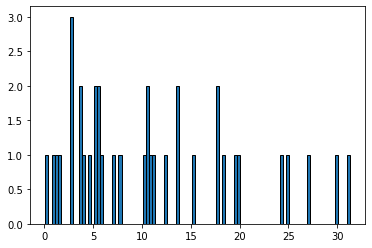

In [123]:
plt.hist(single['Own%'],ec='black',bins=100)